## 선형 회귀 예제

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측 예제

### 사용 데이터 
- Boston Housing Price (보스턴 주택 가격 데이터)
- 사이킷런 1.0 대 버전에서만 제공 (1.2 버전 이후 제공되지 않음)

---
- 보스턴 시의 주택 가격에 대한 데이터
    - 주택의 여러가지 요건들과 주택의 가격 정보 포함
    - 주택의 가격에 영향을 미치는 요소 분석
- 데이터 수 : 506 개
- 피처 개수 :  14 개


피처 설명  
- CRIM: 지역별 범죄 발생률. 1인당 범죄율  
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율  
- INDUS: 비상업지역이 점유하고 있는 토지의 비율(넓이 비율)  
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
- NOX: 일산화질소 농도  
- RM: 주택 1가구당 평균 방의 개수  
- AGE: 1940년 이전에 건축된 소유주택의 비율  
- DIS: 5개 주요 고용센터까지의 가중 거리(접근성 지수)  
- RAD: 고속도로 접근 용이도(접근성 지수)  
- TAX: 10,000달러당 재산세율  
- PTRATIO: 자치시(town)별 학생/교사 비율  
- B: 자치시별 흑인 거주 비율  
- LSTAT: 하위 계층의 비율  
- PRICE(MEDV): 본인 소유의 주택 가격(중앙값) (단위: $1,000)  

### 보스턴 주택 가격 예측 모델 생성  
- 사용 데이터 세트 : 보스턴 주택 가격 데이터 세트  
- 데이터 준비 : 피처 데이터 / 레이블 데이터  
- 데이터 세트 분리 : 학습 / 테스트 데이터 세트   
    - train_test_split() 이용  
- 사용 알고리즘(모델) : LinearRegression  
- 모델 학습 및 예측 수행 : fit() / predict()  
- 모델 평가  
    - MSE 측정 : metrics 모듈의 mean_squared_error() 이용   
    - RMSE 측정 : root_mean_squared_error() 이용  
    - $R^2$ Score 측정 : r2_score() 이용    
- 교차 검증 수행  

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

boston_df = df_pop = pd.read_csv('./data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


집 값에 크게 영향을 미치는 중요한 요소 추청  
- 삶의 편의성을 생각하면 : RM (거주할 수 있는 방 개수)
- RAD : 고속도로 접근 용이도 (미국은 차가 있어야 하니까)

각 피처별로 주택 가격에 미치는 영향도를 조사  
총 8개의 피처에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인

Seaborn의 regplot() 이용  
- 각 ax마다 피처와 PRICE의 관계 표현  
- 2차원 평면에서 X축을 피처, Y축을 타깃값으로 설정하면  
- 산점도와 함께 선형 회귀 직선표시  

### 집 값에 영향을 미치는 피처 확인 

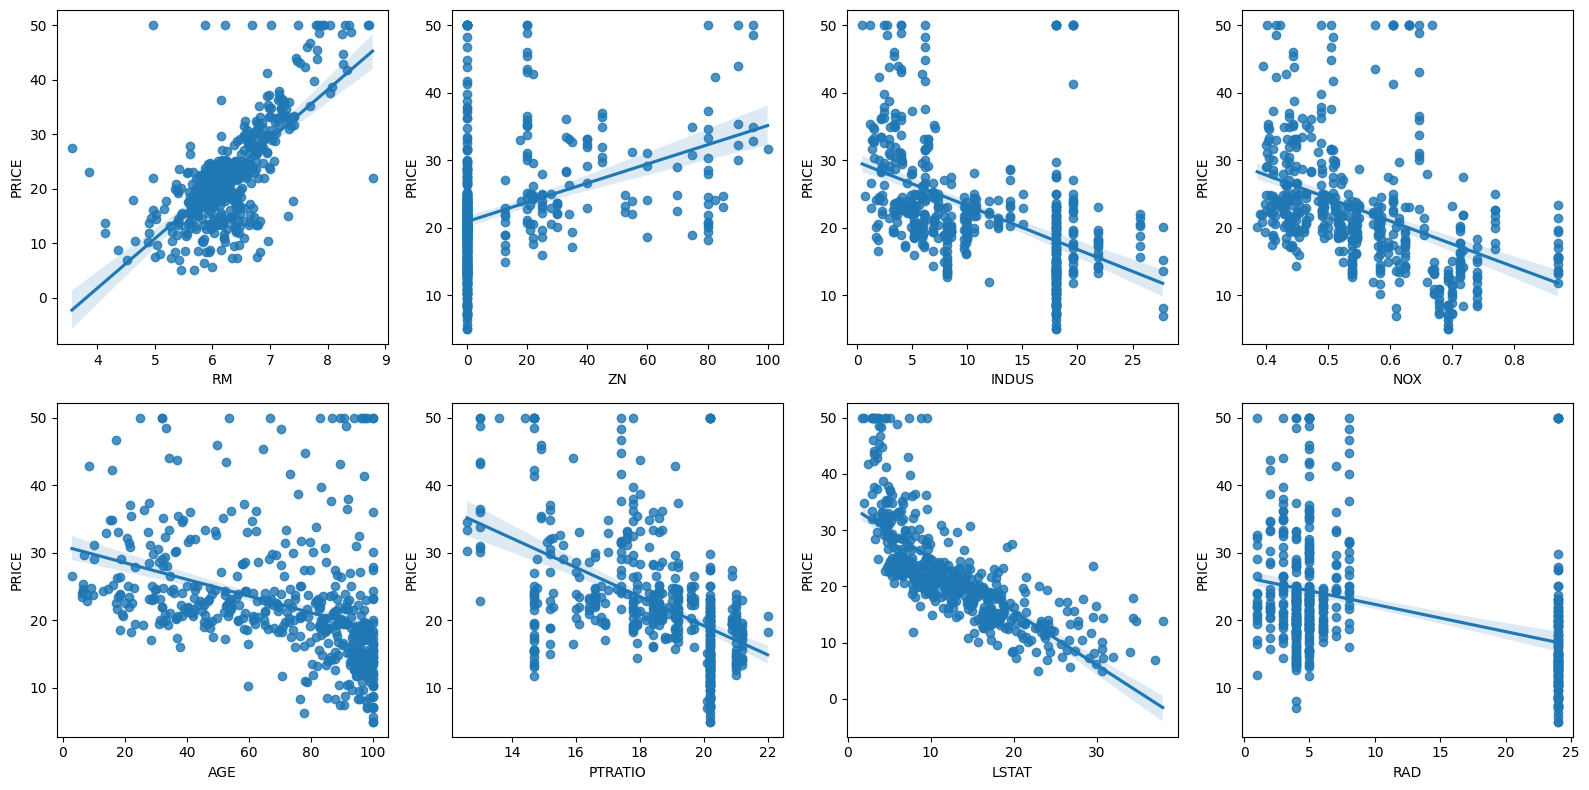

In [ ]:
# 8개 피처 선택
# 방의 개수
# 25,000평방피트를 초과하는 거주 지역의 비율
# 비상업지역이 점유하고 있는 토지의 비율(넓이 비율)
# 일산화질소 농도
# 1940년 이전에 건축된 소유주택의 비율
# 학생/교사 비율
# 하위 계층의 비율
# 고속도로 접근 용이도

# 선택한 피처들만 포함시켜서
# sns.regplot() 사용하여 
# 2행 4열로 시각화 

features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

plt.figure(figsize=(16, 8))

plt.show()

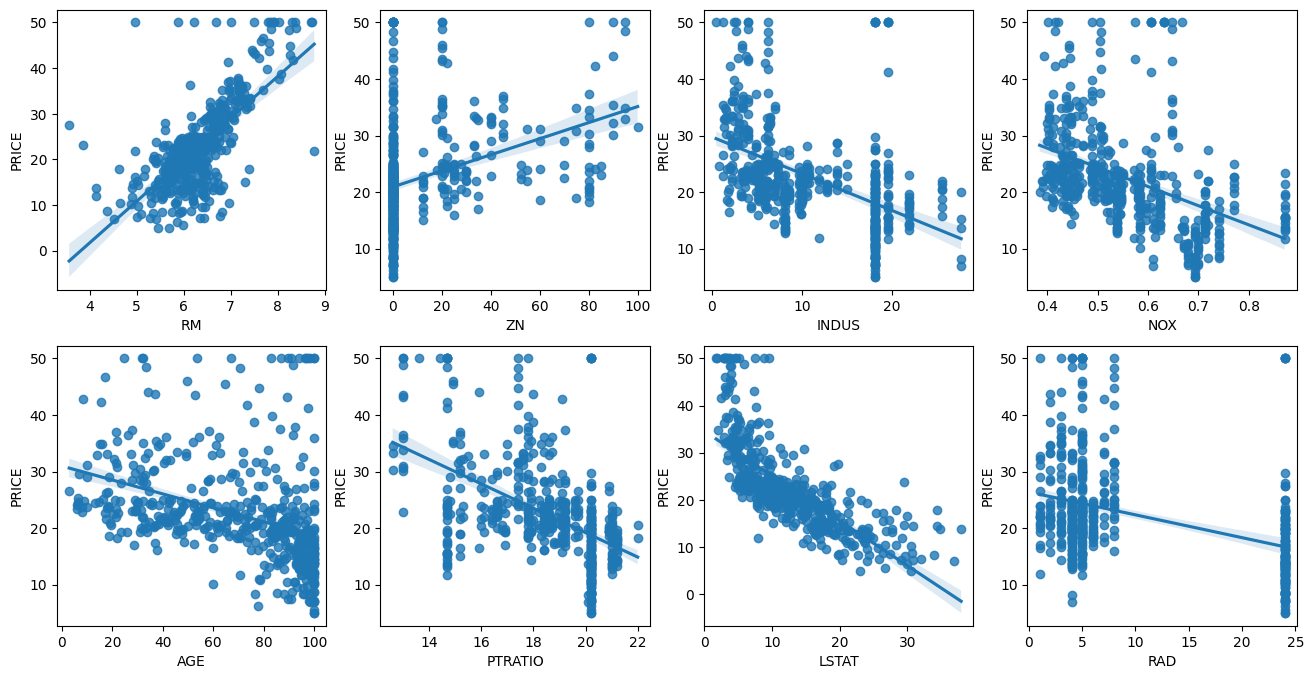

In [7]:
# 함수로 작성

y_target = boston_df['PRICE']
X_features = boston_df[['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']]

def visualize():
    plt.figure(figsize=(16, 8))

    for i, column in enumerate(X_features.columns, 1):
        plt.subplot(2, 4, i)
        sns.regplot(x=X_features[column], y=y_target)
    
    plt.show();
    
visualize()



<Figure size 1000x1000 with 0 Axes>

<Axes: >

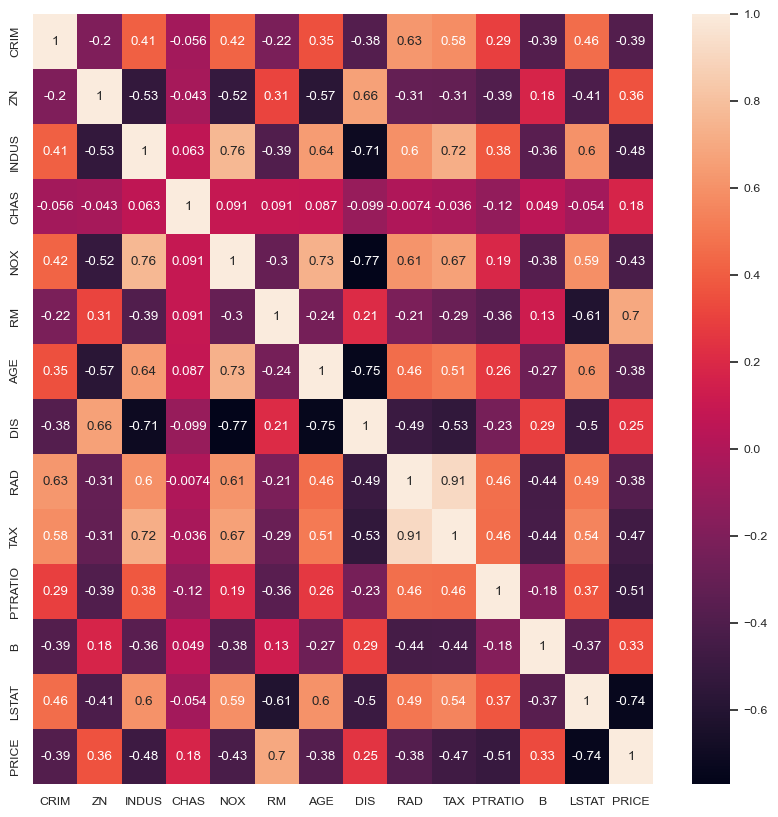

In [8]:
#상관 관계 행렬 : 히트맵으로 확인
# 상관 계수를 이용해서 히트맵으로 표현 
df_corr = boston_df.corr()
# df_corr

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True) # , cbar=False
plt.show()

# RM :0.7 양의 상관관계
# LSTAT : -0.74 음의 상관관계 

In [ ]:
# 상관 계수가 높은 순으로 확인 (상관관계가 높은 순)
corr_order =  
corr_order


LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

In [ ]:
# 음의 방향, 양의 방향 다 확인 
corr_order = 
corr_order

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

### 데이터 준비 

In [11]:
# 타깃값 데이터 세트
y_target = boston_df['PRICE']

# 피처값 데이터 세트
X_data = boston_df.drop('PRICE', axis=1)


### 데이터 세트 분리

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data ,
                                                       y_target,
                                                       test_size=0.3, 
                                                       random_state=156)

### 예측 모델 생성 

In [13]:
# 예측 모델 생성
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)

LinearRegression()

### 모델 평가

In [1]:
import sklearn
print(sklearn.__version__)

1.5.1


In [ ]:
# sckit-learn 버전에 따라 함수 다르게 사용
# 1.3.1 버전 : root_mean_squared_error() 없음. 오류
# 1.5.1 버전 : root_mean_squared_error() 사용 가능 

In [ ]:
# 아나콘다 가상 환경에서 설치
# 아나콘다 프롬프트 열고
# 가상환경 활성화 : conda activate MLenv
# pip install scikit-learn==1.5.1
# pip list 로 설치된 버전 확인

In [ ]:
# 모델 평가 : MSE / RMSE / R 제곱

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# rmse 구하기 : 방법1

# rmse # 4.158956107955709

# rmse 구하기 방법2
# (1) mse 구하고 (2) np.sqrt() 함수 사용

# rmse # 4.158956107955709

# R제곱 : r2_score() 사용
r2 = 

# 평가 지표 출력
print(f"MSE : {mse:.4F}, RMSE : {rmse:.4f}")
print(f"R제곱 : {r2:.4f}")

# MSE : 17.2969, RMSE : 4.1590
# R제곱 : 0.7572

# RMSE는 낮을수록 좋고
# R제곱은 1에 가까울수록 좋은 수치임 

# 현재 예측 모델은
# 나쁜 수치는 아니지만 만족할만한 수치도 아님 

4.158956107955709

MSE : 17.2969, RMSE : 4.1590
R제곱 : 0.7572


In [20]:
# 실제값과 예측값의 평균 확인
y_test.mean()
y_pred.mean()
# 예측값 평균이 좀 더 높음

21.654605263157894

23.04751791231963

In [ ]:
# 절편과 회귀 계수 값 확인
print("절편 값 : ", )
print("회귀 계수 값 : ", )

절편 값 :  40.99559517216429
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# coef_ 속성은 회귀 값만 가지고 있으므로 
# 회귀값을 피처별로 매칭시키고
# 내림차순 정렬해서 확인 
# 시리즈(값, index).정렬(내림차순)
coef_feat = pd.Series(np.round(lr_reg.coef_, 1), index=X_train.columns).sort_values(ascending=False)
coef_feat



RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 교차 검증 수행

교차 검증 수행
- 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증 수행     
- MSE와 RMSE 측정  
- cross_val_score()에서는 RMSE를 제공하지 않음    
    - MSE 수치 결과를 RMSE로 변환 작업 필요     

MSE 구하는 방법      
- MSE 값을 반환받기 위해 매개변수 scoring='neg_mean_squared_error' 설정  
    - 주의!!  
    - 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데      
        - 예: 정확도, f1, recall, precision, roc_auc   
    - MSE는 낮을수록 좋은 회귀 모델  
        - 그래서 scoring='neg_mean_squared_error'로 사이킷런의 scoring 함수를 호출하면  
        - MSE 값에 -1을 곱해서 반환됨  
        - 따라서 corss_val_score()에서 반환된 값에 다시 -1을 곱해야   
            - 양의 값인 원래 모델에서 계산된 MSE 값이 됨  
- 결론 :  
    - scoring='neg_mean_squared_error' 설정  
    - **반환된 값에 -1 곱해서 양의 값으로 변환해서 사용**

 


In [ ]:
# 5개의 폴드 세트에서 교차 검증 수행
# MSE와 RMSE 측정

from sklearn.model_selection import cross_val_score

# 5개 Fold 셋으로 MSE 구함 
neg_mse_scores = 

# neg_mean_squared_error가 음수값으로 반환되므로 -1을 곱해서 사용
# RMSE는 np.sqrt() 사용
rmse_scores = 
avg_rmse = 

# 평가 지표 출력
print('5 Folds 교차검증 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 Folds 교차검증 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 Folds 교차검증 평균 RMSE : ', np.round(avg_rmse, 3))


# 5 Folds 교차검증 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
# 5 Folds 교차검증 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
# 5 Folds 교차검증 평균 RMSE :  5.829

# 교차검증 전 RMSE : 4.1590
# 교차검증 후 RMSE : 5.829

# 좀 더 정확한 평가를 위해 교차 검증을 수행했는데
# RMSE 값이 약간 더 높게 나옴
# 아직 만족할만한 수치는 아님 

# 데이터 부족이 가장 큰 문제인 듯 (테스트용, 검증용 데이터 부족)
# 좀 더 충분한 데이터가 있어야 함 

5 Folds 교차검증 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 Folds 교차검증 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 Folds 교차검증 평균 RMSE :  5.829


### LinearRegression 하이퍼 파라미터 튜닝
- LinearRegression 모델은 파라미터가 몇 개 없기 때문에
- 하이퍼 파라미터 튜닝은 거의 수행하지 않음
- 하이퍼 파라미터 튜닝을 적용하려면 릿지, 라쏘, 엘라스틱 넷을 사용   

In [15]:
# 선형 회귀 계열은 데이터의  정규 분포에 따라
# 예측 성능에 영향을 받을 수 있으므로
# 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤
# 학습/테스트 데이터 세트로 분리

### 스케일링 수행 후 데이터 세트 분리하고 모델링 수행 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression




X_train , X_test , y_train , y_test = train_test_split(X_data_scaled,
                                                       y_target,
                                                       test_size=0.3, 
                                                       random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R제곱 : r2_score() 사용
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print(f"MSE : {mse:.4F}, RMSE : {rmse:.4f}")
print(f"R제곱 : {r2:.4f}")

# 표준 스케일링 적용 전 
# MSE : 17.2969, RMSE : 4.1590
# R제곱 : 0.7572

# 표준 스케일링 적용 후
# MSE : 17.2969, RMSE : 4.1590
# R제곱 : 0.7572

# 피처값 표준 스케일링 적용 전/후 동일 

LinearRegression()

MSE : 17.2969, RMSE : 4.1590
R제곱 : 0.7572


<Axes: xlabel='PRICE', ylabel='Count'>

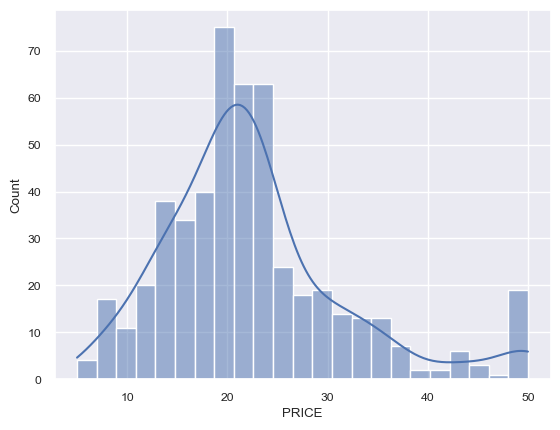

<Axes: xlabel='PRICE', ylabel='Count'>

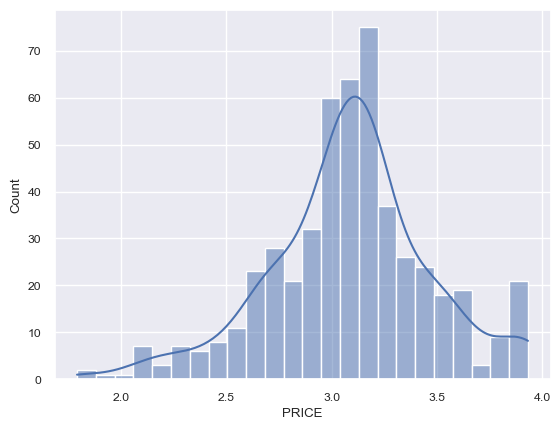

In [ ]:
# 로그 변환된 타깃값으로 데이터 세트 분리하고 모델링 수행
# 피처값 : 표준 스케일링 적용
# 타깃값 : 로그 변환 수행 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 피처에 표준 스케일링 적용


# 타깃값 로그 변환 수행 


# 데이터 세트 분리
X_train , X_test , y_train , y_test = train_test_split(X_data_scaled ,
                                                       y_target_log,
                                                       test_size=0.3, 
                                                       random_state=156)
# 모델 생성/학습/예측
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)

# 모델 평가
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R제곱 : r2_score()
r2 = r2_score(y_test, y_pred)

# 평가지표출력
print(f"MSE : {mse:.4f}, RMSE : {rmse:.4f}")
print(f"R제곱 : {r2:.4f}")





LinearRegression()

MSE : 0.0311, RMSE : 0.1763
R제곱 : 0.7938
